In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

In [3]:
df = pd.read_csv('data/Summer-Olympic-medals.csv', encoding="ISO-8859-1")
df.head()

City    Year     Sport Discipline           Event  \
0  Montreal  1976.0  Aquatics     Diving  3m springboard   
1  Montreal  1976.0  Aquatics     Diving  3m springboard   
2  Montreal  1976.0  Aquatics     Diving  3m springboard   
3  Montreal  1976.0  Aquatics     Diving  3m springboard   
4  Montreal  1976.0  Aquatics     Diving    10m platform   

                    Athlete Gender Country_Code        Country Event_gender  \
0           KÖHLER, Christa  Women          GDR   East Germany            W   
1       KOSENKOV, Aleksandr    Men          URS   Soviet Union            M   
2      BOGGS, Philip George    Men          USA  United States            M   
3  CAGNOTTO, Giorgio Franco    Men          ITA          Italy            M   
4    WILSON, Deborah Keplar  Women          USA  United States            W   

    Medal  
0  Silver  
1  Bronze  
2    Gold  
3  Silver  
4  Bronze

In [4]:
df.shape

(15433, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15433 entries, 0 to 15432
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   City          15316 non-null  object 
 1   Year          15316 non-null  float64
 2   Sport         15316 non-null  object 
 3   Discipline    15316 non-null  object 
 4   Event         15316 non-null  object 
 5   Athlete       15316 non-null  object 
 6   Gender        15316 non-null  object 
 7   Country_Code  15316 non-null  object 
 8   Country       15316 non-null  object 
 9   Event_gender  15316 non-null  object 
 10  Medal         15316 non-null  object 
dtypes: float64(1), object(10)
memory usage: 1.3+ MB


In [6]:
df.describe()

Year
count  15316.000000
mean    1993.620789
std       10.159851
min     1976.000000
25%     1984.000000
50%     1996.000000
75%     2004.000000
max     2008.000000

In [7]:
df.nunique()

City                9
Year                9
Sport              28
Discipline         41
Event             293
Athlete         11337
Gender              2
Country_Code      128
Country           127
Event_gender        3
Medal               3
dtype: int64

In [8]:
# get if there are unique only data in columns
df_unique = df.loc[:, df.nunique() == 1]
df_unique.head()

Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4]

In [9]:
# if uncommented, install missingno if not already installed
!pip install missingno
# note: to works it need matplotlib=3.5.0
import missingno as msno

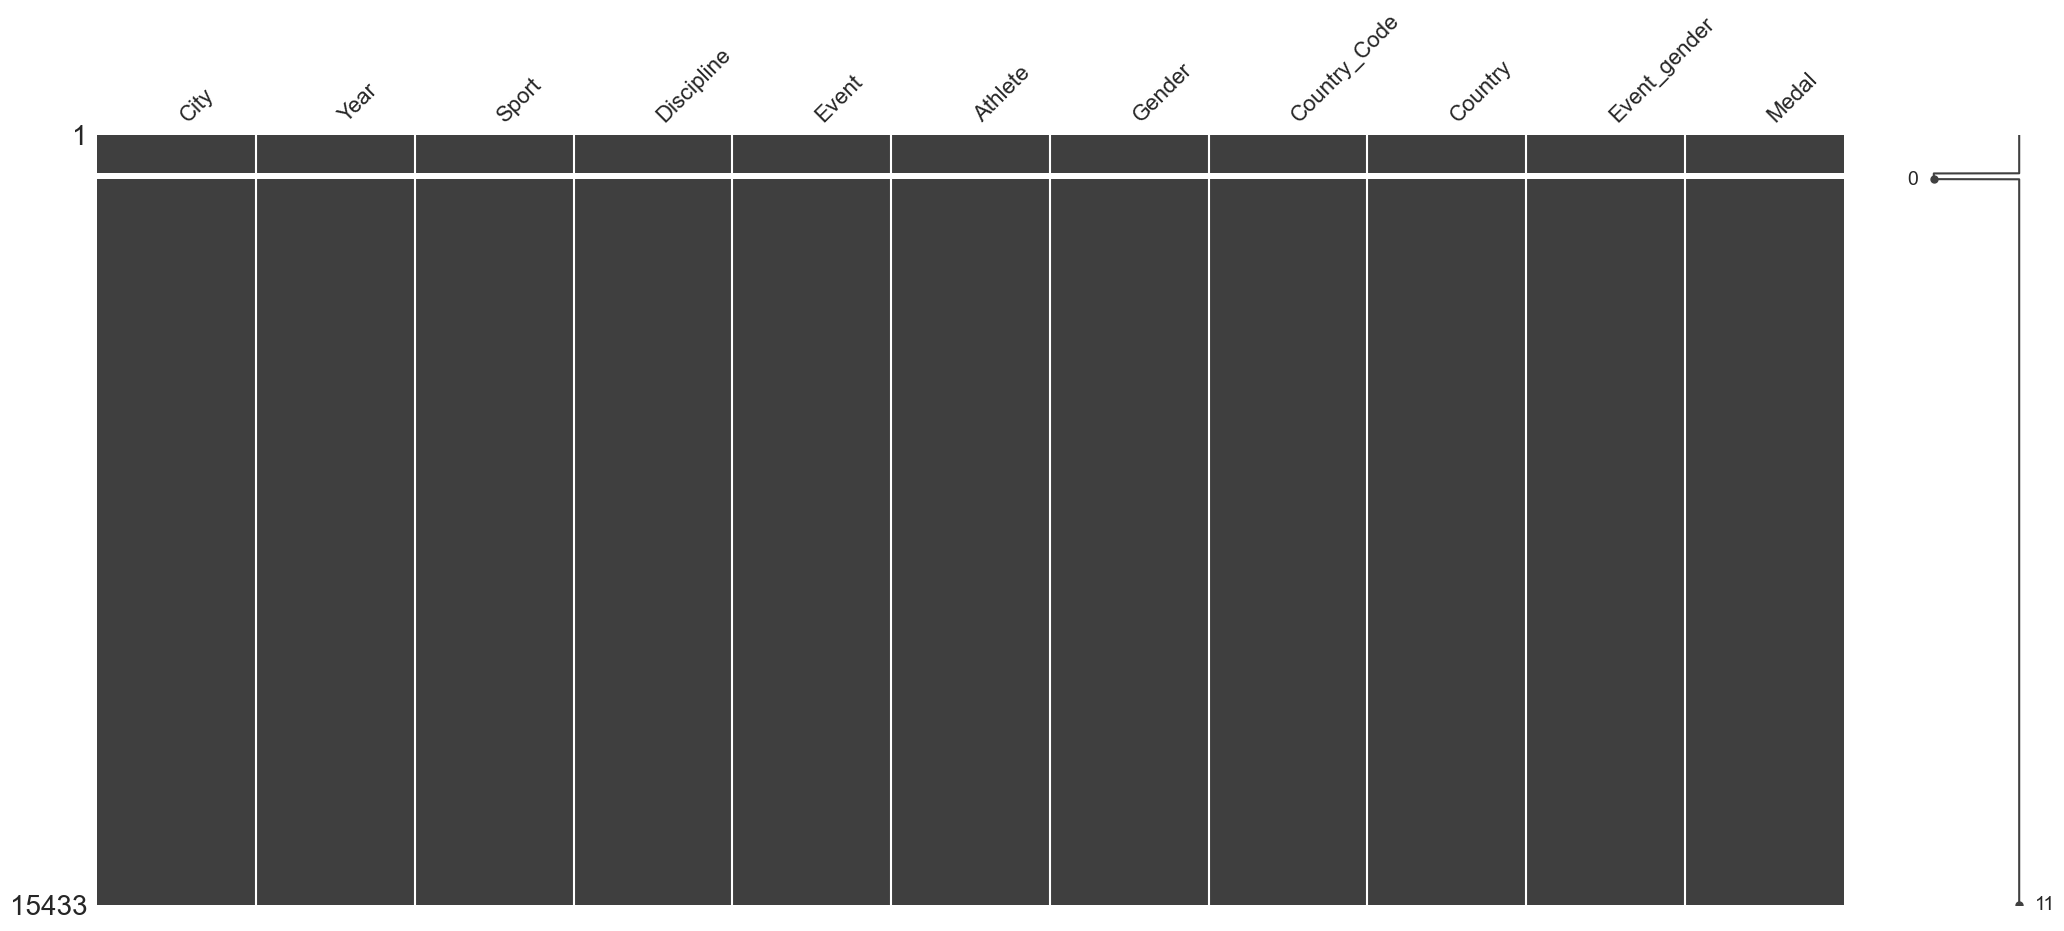

In [10]:
warnings.filterwarnings('ignore')
msno.matrix(df)
warnings.filterwarnings('default')

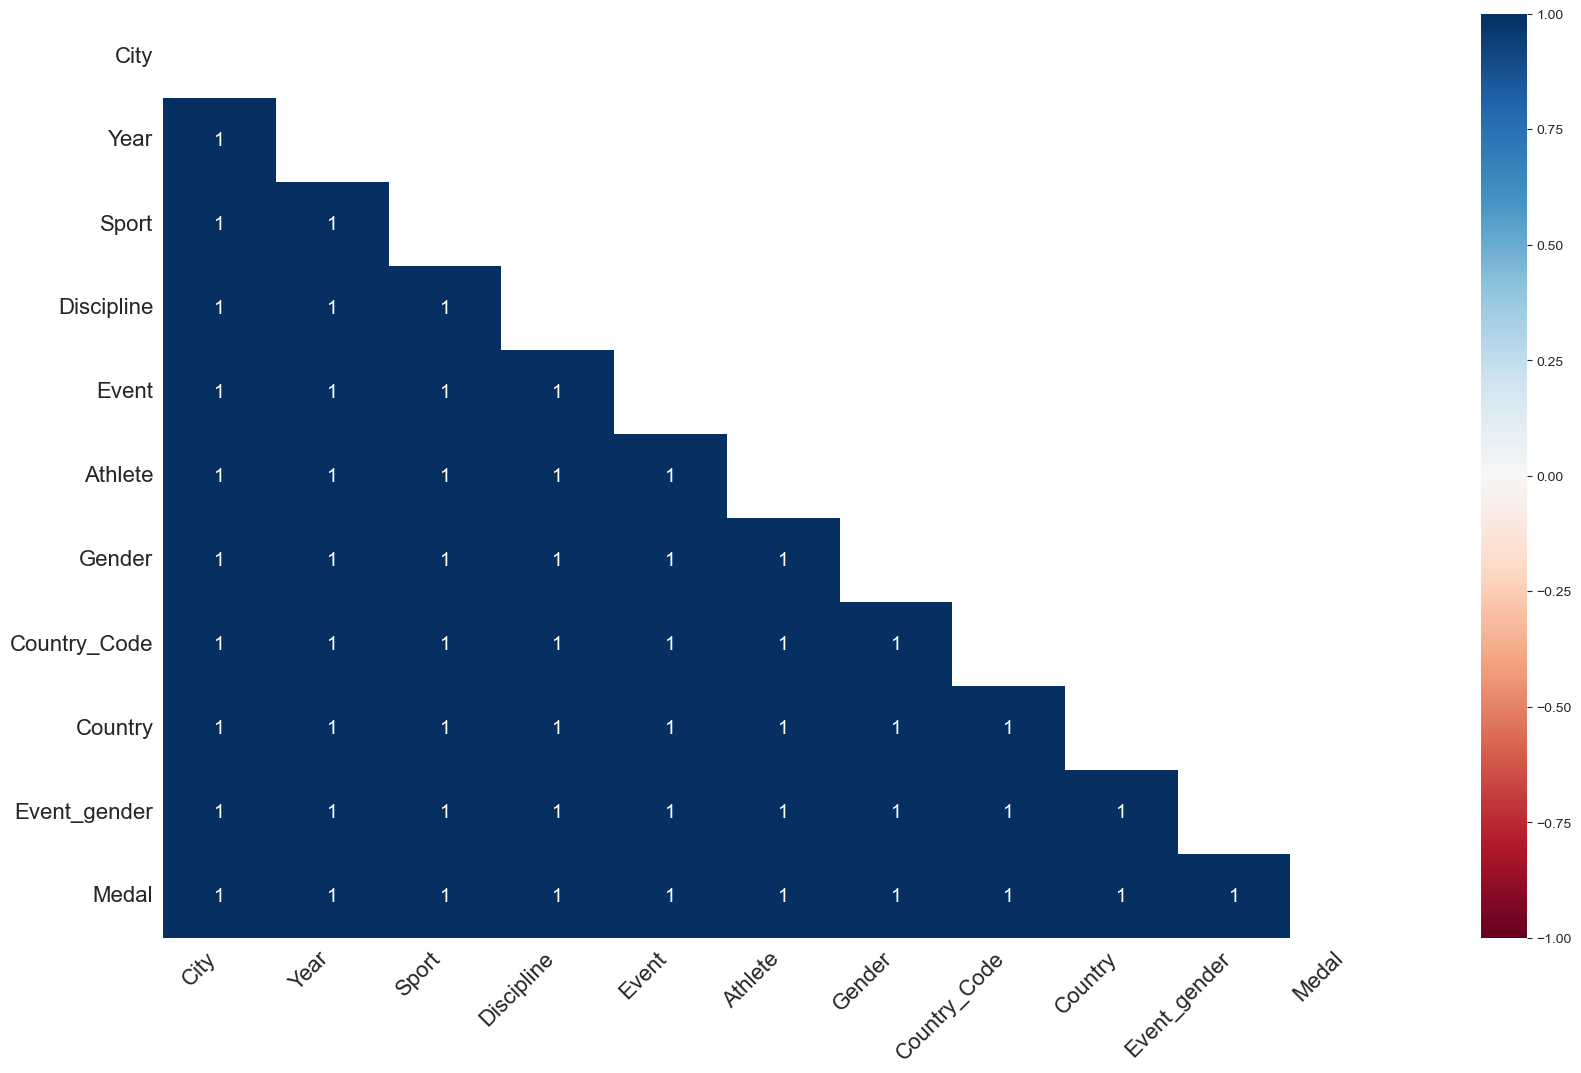

In [11]:
warnings.filterwarnings('ignore')
msno.heatmap(df)
warnings.filterwarnings('default')

In [12]:
# return only the cols with at least 5 missing values
df[df.isna().sum(axis=1) > 2]

City  Year Sport Discipline Event Athlete Gender Country_Code Country  \
770  NaN   NaN   NaN        NaN   NaN     NaN    NaN          NaN     NaN   
771  NaN   NaN   NaN        NaN   NaN     NaN    NaN          NaN     NaN   
772  NaN   NaN   NaN        NaN   NaN     NaN    NaN          NaN     NaN   
773  NaN   NaN   NaN        NaN   NaN     NaN    NaN          NaN     NaN   
774  NaN   NaN   NaN        NaN   NaN     NaN    NaN          NaN     NaN   
..   ...   ...   ...        ...   ...     ...    ...          ...     ...   
882  NaN   NaN   NaN        NaN   NaN     NaN    NaN          NaN     NaN   
883  NaN   NaN   NaN        NaN   NaN     NaN    NaN          NaN     NaN   
884  NaN   NaN   NaN        NaN   NaN     NaN    NaN          NaN     NaN   
885  NaN   NaN   NaN        NaN   NaN     NaN    NaN          NaN     NaN   
886  NaN   NaN   NaN        NaN   NaN     NaN    NaN          NaN     NaN   

    Event_gender Medal  
770          NaN   NaN  
771          NaN   NaN  
772          NaN   NaN  
773          NaN   NaN  
774          NaN   NaN  
..           ...   ...  
882          NaN   NaN  
883          NaN   NaN  
884          NaN   NaN  
885          NaN   NaN  
886          NaN   NaN  

[117 rows x 11 columns]

In [13]:
# drop the empty columns

In [14]:
missing_vals = df.isna().sum(axis=1)

drop_rows = missing_vals[missing_vals > 2].index

df.drop(drop_rows, inplace=True)
df.reset_index(drop=True, inplace=True)

df[df.isna().sum(axis=1) > 2]

Empty DataFrame
Columns: [City, Year, Sport, Discipline, Event, Athlete, Gender, Country_Code, Country, Event_gender, Medal]
Index: []

In [15]:
# verify if there are outliners defined as out of 3 standard deviation
numerical_cols = df.select_dtypes(include=['float64', 'int64'])

means = numerical_cols.mean()
stds = numerical_cols.std()

# set the threshold to 3 standard deviations
threshold = 3

outliers = pd.DataFrame()

for col in numerical_cols.columns:
    col_outliers = df[(df[col] < means[col] - threshold * stds[col]) |
                                            (df[col] > means[col] + threshold * stds[col])]
    col_outliers['feature'] = col
    outliers = pd.concat([outliers, col_outliers])

outliers.head()

Empty DataFrame
Columns: [City, Year, Sport, Discipline, Event, Athlete, Gender, Country_Code, Country, Event_gender, Medal, feature]
Index: []

array([[<AxesSubplot:title={'center':'Year'}>]], dtype=object)

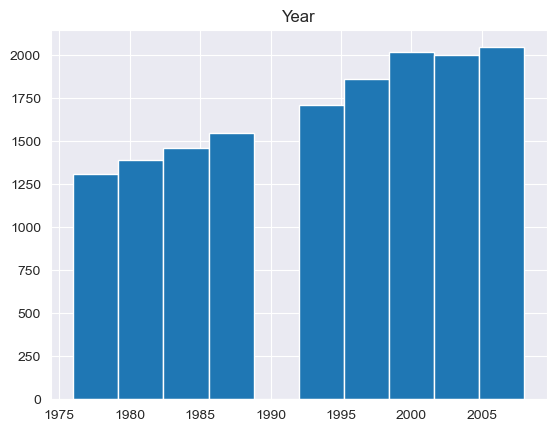

In [19]:
# check distribution
df_numeric_ = df.select_dtypes(include=[np.number])
df_numeric_.hist()

In [16]:
# check relation with df pairplot
sns.pairplot(df, vars=numerical_cols.columns[:-1], hue="Gender")

ValueError: No variables found for grid columns.

In [ ]:
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler



In [20]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=0, n_init="auto").fit(df)

ValueError: could not convert string to float: 'Montreal'